In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
class FEM_1D():
    
    def __init__(self,
                 n       = 10,
                 D       = 1,
                 lamda   = 1,
                 func    = lambda x: 1,
                 u_exact = lambda x: 1):
        
        self.n       = n
        self.D       = D
        self.lamda   = lamda
        self.func    = np.vectorize(func)
        self.u_exact = np.vectorize(u_exact)
        self.h       = 1/(n-1)
        
    def femsolve1d(self, plot = True):
        
        self.GenerateMesh()
        self.GenerateTopology()
        self.AssembleMatrix()
        self.AssembleVector()
        
        self.u_fem = np.linalg.solve(self.S,self.f)
        self.u_ex  = self.u_exact(self.x)
        
        self.error         = self.u_ex - self.u_fem
        self.max_abs_error = np.max(np.abs(F.error))
        
        if plot:
            self.plot()
        
    def plot(self):
        
        fig, (ax_sols, ax_error) = plt.subplots(1,2, figsize = (10,5))
        
        ax_sols.plot(self.x,self.u_fem, label = '$u_{FEM}$')
        ax_sols.plot(self.x,self.u_ex,  label = '$u_{exact}$')
        ax_sols.set_xlabel("$x$")
        ax_sols.legend()
        
        ax_error.plot(self.x,self.error, label = 'Error $u_{exact}-u_{FEM}$')
        ax_error.set_xlabel("$x$")
        ax_error.legend()
        plt.show()
        
        
    def GenerateMesh(self):
        
        self.x = np.linspace(0,1,self.n)
        
    def GenerateTopology(self):
        
        self.elmat = np.zeros((self.n-1,2), dtype = int)
        
        for i in range(self.n-1):
            
            self.elmat[i,0] = i
            self.elmat[i,1] = i+1
            
    def GenerateElementMatrix(self):
        
        S_elem      = np.zeros((2,2))
        S_elem[0,0] = self.D/self.h + self.lamda*self.h/3
        S_elem[1,1] = S_elem[0,0]
        S_elem[0,1] = -self.D/self.h + self.lamda*self.h/6
        S_elem[1,0] = S_elem[0,1]
        
        self.S_elem = S_elem
        
    def AssembleMatrix(self):
        
        S = np.zeros((self.n,self.n))
        
        for i in range(self.n-1):
            self.GenerateElementMatrix()
            
            for j,k in product([0,1], repeat = 2):  
                S[self.elmat[i,j],self.elmat[i,k]] += self.S_elem[j,k]
            
        self.S = S
        
    def GenerateElementVector(self,i):
        
        self.f_elem = self.h/2  * np.array([self.func(self.x[i]),self.func(self.x[i+1])])
        
    def AssembleVector(self):
        
        f = np.zeros((self.n,))
        
        for i in range(self.n-1):
            
            self.GenerateElementVector(i)
            
            for j in [0,1]:
                f[self.elmat[i,j]] += self.f_elem[j]
            
        self.f = f
            

## Assigment 12

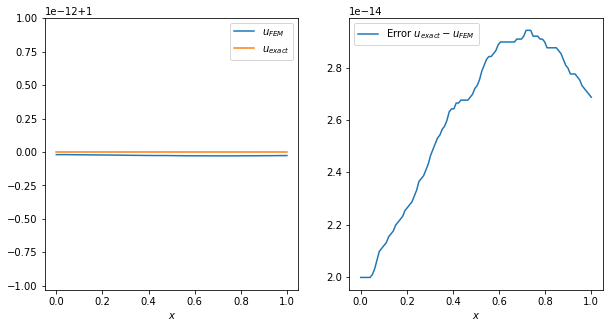

In [3]:
F = FEM_1D(n       = 100,
           func    = lambda x: 1,
           u_exact = lambda x: 1)
F.femsolve1d()

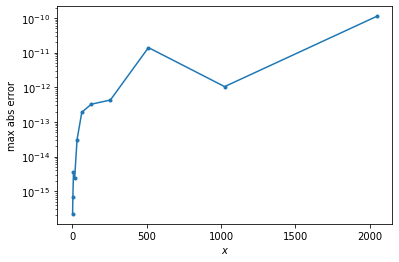

In [8]:
abs_errors = []
ns         = []

fig, ax = plt.subplots()

for i in range(1,12):
    
    n = 2**i
    
    F = FEM_1D(n   = n,
           func    = lambda x: 1,
           u_exact = lambda x: 1)
    
    F.femsolve1d(plot = False)
    
    ns.append(n)
    abs_errors.append(F.max_abs_error)

ax.set_xlabel('$x$')
ax.set_ylabel('max abs error')
ax.plot(ns,abs_errors, marker = '.')
ax.set_yscale('log')
plt.show()

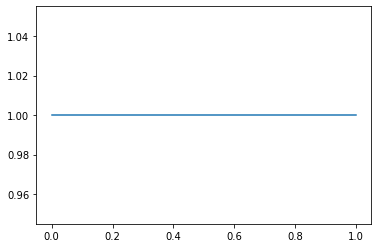

In [5]:
l  = 1
D  = 1
C  = np.sqrt(l/D)
c1 = (-np.exp(C)*C*(np.exp(-C)-1)+np.exp(-C)*C*(np.exp(C)-1))/(2*np.sqrt(l*D)*(np.exp(C)-np.exp(-C)))

def f(x):
    A = 0.5/np.sqrt(l*D)*C*(np.exp(-C*x)-1) + c1
    B = 0.5/np.sqrt(l*D)*C*(np.exp(C*x)-1) + c1
    return A*np.exp(C*x) + B*np.exp(-C*x)

X = np.linspace(0,1,100)
u = f(X)

plt.plot(X,u)

## Assignment 13

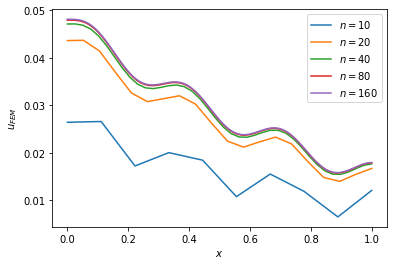

In [17]:
fig, ax = plt.subplots()

for n in [10,20,40,80,160]:
    F = FEM_1D(n       = n,
               func    = lambda x: np.sin(20*x))
    
    F.femsolve1d(plot = False)
    
    ax.plot(F.x,F.u_fem, label = f'$n = {n}$')
    
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$u_{FEM}$")
plt.show()